<a href="https://colab.research.google.com/github/spradeephsundar/Melanoma_Detection_Using_CNN/blob/main/Pradeeph_Sundar_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Melanoma Detection Assignment**

Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Importing the Skin Cancer Data to google drive

In [2]:
# Set up to use the data by mounting on the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/My Drive/Colab Notebooks/MelanomaTrain")
data_dir_test = pathlib.Path("/content/drive/My Drive/Colab Notebooks/MelanomaTest")


In [4]:
# Checking the path for train and test images
print(data_dir_train)
print(data_dir_test)

/content/drive/My Drive/Colab Notebooks/MelanomaTrain
/content/drive/My Drive/Colab Notebooks/MelanomaTest


In [5]:
# Understanding the number of images in the train and test directory
image_count_train = len(list(data_dir_train.glob("*/*.jpg")))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


There are 2,239 images in the train folder and 118 images in the test folder.

Creating a dataset for the images

In [6]:
# Defining some important parameters
batch_size = 32
img_height = 180
img_width = 180

As per instructions we are defining the batch_size, img-height and img-width. We will be using this soon.

In [7]:
# Importing the image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
# Creating a dataset using images in the train folder
# Have used image_dataset_from_directory from tf.keras.utils
# Also, have used seed=123 as suggested
# Have resized the images - img_height(180)*img_width(180), while writing the dataset

train_ds = image_dataset_from_directory(
  data_dir_train,
  validation_split=None,
  # subset="training",
  seed=123,
  image_size=(img_height, img_width),
  # batch_size=batch_size
)




Found 2239 files belonging to 9 classes.


We have created the train_ds dataset and it has 2,239 files belonging to 9 classes.

In [9]:
# Listing out all the classes of skin cancer and storing them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Visualization of the data

In [ ]:
import matplotlib.pyplot as plt


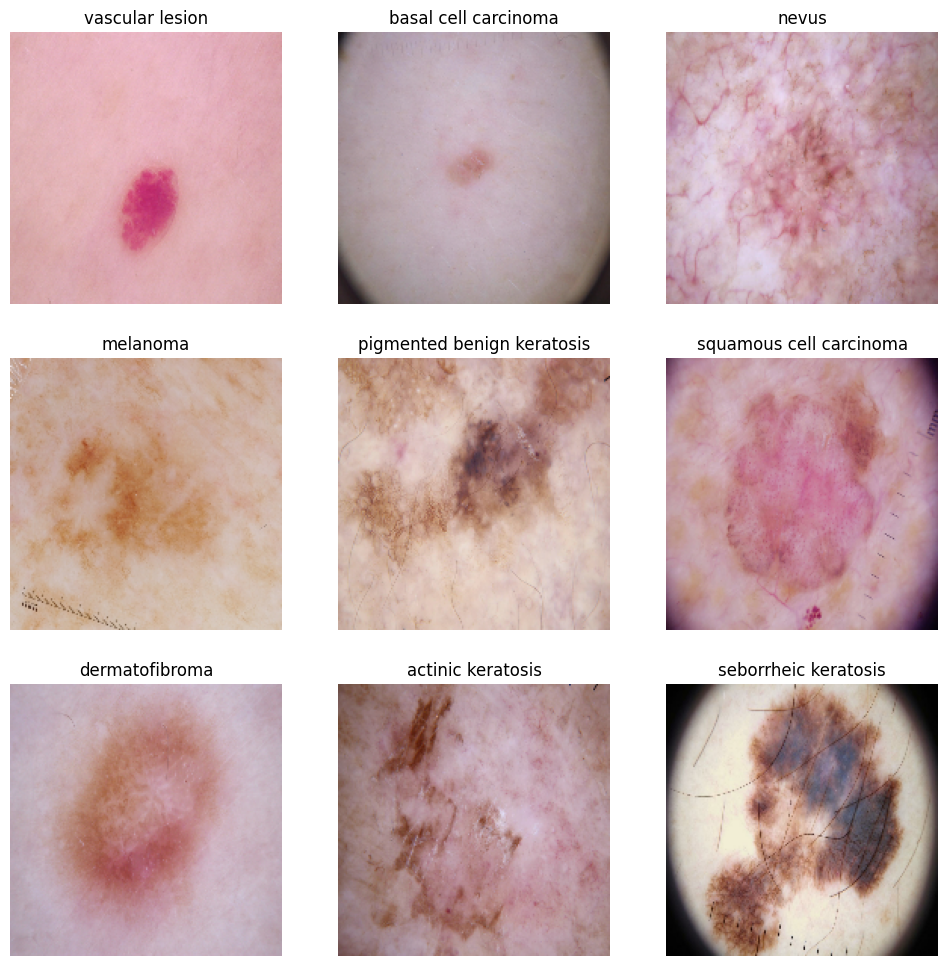

In [ ]:
# Code for visualization
# Create a dictionary to store one image per class
class_images = {}

# Iterate through the dataset
for images, labels in train_ds:
    for image, label in zip(images, labels):
        class_name = class_names[label.numpy()]
        if class_name not in class_images:
            class_images[class_name] = image.numpy()
            break  # Stop after finding one image per class

# Visualize one image from each class
plt.figure(figsize=(12, 12))
for i, class_name in enumerate(class_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(class_images[class_name].astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

plt.show()

In [ ]:
batch_size

32

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Building The First CNN Model**

In [ ]:
# Defining the batch_size, num_class and epochs
batch_size = 32
num_classes = 9
epochs = 20

Normalization and splitting of the dataset to train and validation sets

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# We have loaded the dataset train_ds with images and labels
# Normalizing the pixel values of dataset "train_ds"
train_ds1 = train_ds.map(lambda x, y: (x / 255.0, y))

# Set a fixed random seed
seed = 123

# Creating a validation set (20% of the data)
val_size = int(0.2 * len(train_ds))
val_ds1 = train_ds1.take(val_size).shuffle(buffer_size=len(train_ds1), seed=seed)
train_ds1 = train_ds1.skip(val_size).shuffle(buffer_size=len(train_ds1), seed=seed)


Out of the data in the train-ds dataset, we will be using 80% for training (train_ds1) and 20% for validation (val_ds1).

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds1 = val_ds1.cache().prefetch(buffer_size=AUTOTUNE)

Defining the first CNN Model

In [ ]:
# Define the first CNN model
model_t1= models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

Compiling the first CNN model

In [ ]:
# Compiling the first CNN model
model_t1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the first CNN model

In [ ]:
history = model_t1.fit(train_ds1, batch_size = batch_size, epochs=20, validation_data=val_ds1)

Epoch 1/20
56/56 [==============================] - 105s 38ms/step - loss: 2.4267 - accuracy: 0.2613 - val_loss: 1.7230 - val_accuracy: 0.3906
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.6714 - accuracy: 0.3774 - val_loss: 1.5458 - val_accuracy: 0.4263
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4677 - accuracy: 0.4969 - val_loss: 1.3410 - val_accuracy: 0.5357
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3339 - accuracy: 0.5226 - val_loss: 1.3614 - val_accuracy: 0.5513
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2714 - accuracy: 0.5472 - val_loss: 1.1873 - val_accuracy: 0.5558
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.0968 - accuracy: 0.6136 - val_loss: 1.0335 - val_accuracy: 0.6585
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.0522 - accuracy: 0.6214 - val_loss: 1.2250 - val_accuracy: 0.5625
Epoch 8/20


The accuracy and val_accuracy look good.

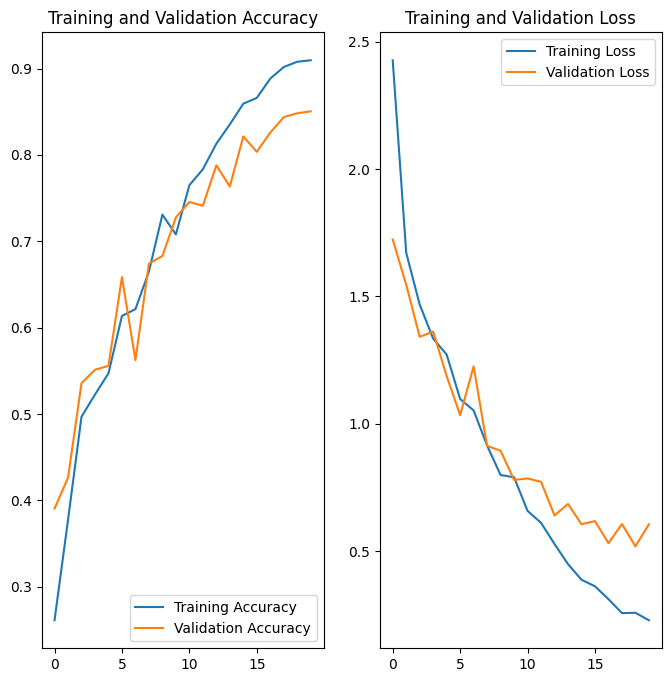

In [ ]:
# Code to plot the traning/validation accuracy & loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Looking at the training and validation accuracy, it does not look like the model is overfitting (as both the numbers are close).

Evaluating the test set using the first model

In [ ]:
test_ds = image_dataset_from_directory(
  data_dir_test,
  validation_split=None,
  image_size=(img_height, img_width),
  )

Found 118 files belonging to 9 classes.


There are about 118 files in the test_ds dataset and it is spread across 9 classes.

In [ ]:
model_t1.evaluate(test_ds)

4/4 [==============================] - 12s 68ms/step - loss: 679.2599 - accuracy: 0.2458


[679.2598876953125, 0.24576270580291748]

The test accuracy is less as compared to the train and validation accuracy.

**Creating a new model using augmented training data**

Augmentation of training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

# Assuming you have loaded train_ds with images and labels
# Normalize pixel values to [0, 1]
# train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# train_ds2 = train_ds.map(lambda x, y: (x / 255.0, y))

# Creating a data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    preprocessing.Rescaling(1./255),  # Normalize pixel values
    preprocessing.RandomFlip("horizontal"),  # Randomly flip images horizontally
    preprocessing.RandomRotation(0.2),  # Randomly rotate images by up to 20 degrees
    preprocessing.RandomZoom(0.2),  # Randomly zoom images
    preprocessing.RandomContrast(0.2),  # Randomly adjust contrast
])

# Apply data augmentation to your train_ds dataset
augmented_train_ds1 = train_ds.map(lambda x, y: (data_augmentation(x), y))

We have developed an augmentation pipeline and have come up with a augmented data set (augmented_train_ds1).

Creating a model using the augmented training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

# Assuming you have loaded augmented_train_ds1 with images and labels
# Normalize pixel values to [0, 1]
# augmented_train_ds1 = augmented_train_ds1.map(lambda x, y: (x / 255.0, y))

# Create a validation set (20% of the data)
val_size = int(0.2 * len(augmented_train_ds1))
val_ds2 = augmented_train_ds1.take(val_size).shuffle(buffer_size=len(augmented_train_ds1), seed=seed)
train_ds2 = augmented_train_ds1.skip(val_size).shuffle(buffer_size=len(augmented_train_ds1), seed=seed)

# Define the CNN model (this is the same as the first model that was craeted)
model_t2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 classes
])

# AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds2 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds1.cache().prefetch(buffer_size=AUTOTUNE)

# Compiling the model
model_t2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model using the augmented training data
history = model_t2.fit(train_ds2, batch_size=batch_size, epochs=20, validation_data=val_ds2)

Epoch 1/20
56/56 [==============================] - 3s 25ms/step - loss: 2.4387 - accuracy: 0.2401 - val_loss: 1.8512 - val_accuracy: 0.4018
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.8244 - accuracy: 0.3417 - val_loss: 1.6822 - val_accuracy: 0.4308
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5618 - accuracy: 0.4740 - val_loss: 1.4314 - val_accuracy: 0.5179
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4577 - accuracy: 0.5008 - val_loss: 1.4479 - val_accuracy: 0.4754
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3099 - accuracy: 0.5494 - val_loss: 1.2176 - val_accuracy: 0.5826
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2162 - accuracy: 0.5868 - val_loss: 1.1475 - val_accuracy: 0.5938
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.0947 - accuracy: 0.6131 - val_loss: 1.0485 - val_accuracy: 0.6429
Epoch 8/20
56

For this model, we used augmented data. The training and validation accuracy for this model are both less as compared to the earlier model where we used non-augmented data.

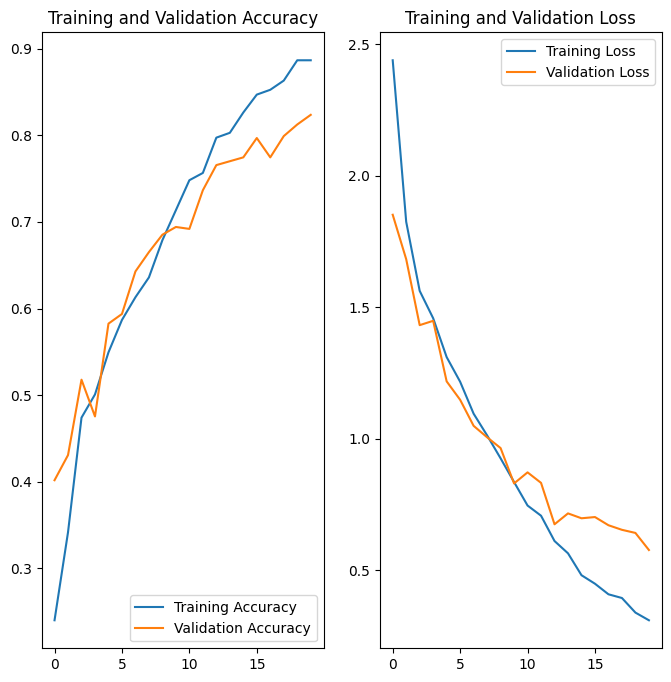

In [ ]:
# Understanding the training and validation accuracy for this model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

For this model, we used augmented data. The training and validation accuracy for this model are both less as compared to the earlier model where we used non-augmented data.

Evaluate the test data using this model

In [ ]:
model_t2.evaluate(test_ds)

4/4 [==============================] - 2s 10ms/step - loss: 422.1242 - accuracy: 0.2458


[422.1241760253906, 0.24576270580291748]

Understanding the class imbalance in the augmented data

In [ ]:
class_counts = {}
for _, label in augmented_train_ds1:
  label = label.numpy()
  # Iterate over each label in the batch
  for single_label in label:
      if single_label not in class_counts:
          class_counts[single_label] = 0
      class_counts[single_label] += 1

for class_index, count in class_counts.items():
  print(f"Class {class_index}: {count} samples")

Class 8: 139 samples
Class 1: 376 samples
Class 3: 438 samples
Class 4: 357 samples
Class 5: 462 samples
Class 0: 114 samples
Class 7: 181 samples
Class 6: 77 samples
Class 2: 95 samples


In [ ]:
# Presenting the classes in the augmented data set in descending order

sorted_counts = sorted(class_counts.items(), key=lambda item: item[1], reverse=True)

for class_index, count in sorted_counts:
  print(f"Class {class_index}: {count} samples")


Class 5: 462 samples
Class 3: 438 samples
Class 1: 376 samples
Class 4: 357 samples
Class 7: 181 samples
Class 8: 139 samples
Class 0: 114 samples
Class 2: 95 samples
Class 6: 77 samples


The above output gives the distribution of samples across classes in descending order. The next step is to handle the imbalance among classes.

In [ ]:
# Handling the class imbalance in the augmented data set (augmented_train_ds1)
# Handle class imbalance using class weights
class_weights = {}
total_samples = sum(class_counts.values())
for class_index, count in class_counts.items():
  class_weights[class_index] = total_samples / (len(class_counts) * count)


In [ ]:
class_weights

{8: 1.7897681854516387,
 1: 0.6616430260047281,
 3: 0.5679857940131913,
 4: 0.6968565203859322,
 5: 0.5384800384800384,
 0: 2.182261208576998,
 7: 1.3744628606507059,
 6: 3.230880230880231,
 2: 2.6187134502923977}

In [ ]:
# Define the CNN model (this is the same as the first model that was craeted)
model_t3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')  # 9 classes
])


In [ ]:
# Compiling the model
model_t3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model with class weights
history = model_t3.fit(
    train_ds2,
    epochs=20,
    batch_size=batch_size,
    validation_data=val_ds2,
    class_weight=class_weights  # Pass class weights to the fit method
)

Epoch 1/20
56/56 [==============================] - 3s 26ms/step - loss: 2.6294 - accuracy: 0.0815 - val_loss: 2.1943 - val_accuracy: 0.0826
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 2.1810 - accuracy: 0.0972 - val_loss: 2.1919 - val_accuracy: 0.1027
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 2.1620 - accuracy: 0.1396 - val_loss: 2.1473 - val_accuracy: 0.3594
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 2.0888 - accuracy: 0.2540 - val_loss: 1.9185 - val_accuracy: 0.2478
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.9099 - accuracy: 0.2864 - val_loss: 1.7036 - val_accuracy: 0.3795
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.7784 - accuracy: 0.3071 - val_loss: 1.7310 - val_accuracy: 0.3795
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5163 - accuracy: 0.4149 - val_loss: 1.4782 - val_accuracy: 0.4688
Epoch 8/20
56

In this case, we see that the training accuracy is about 87% and validation accuracy is about 77%.

In [ ]:
model_t3.evaluate(train_ds)

70/70 [==============================] - 1s 9ms/step - loss: 80.5364 - accuracy: 0.4940


[80.53638458251953, 0.49397051334381104]

We see that the test accuracy in this case which is about 49%, is much better than the test accuracy in the earlier cases (which was close to 25%).  